In [62]:
import glob
import pandas as pd

input_data_path = 'inputdata'
csv_files = glob.glob(input_data_path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
result = pd.concat(df_list, ignore_index=True)
result = result.dropna(thresh=6)

In [63]:
result['Marka pojazdu'].value_counts()

Marka pojazdu
Audi       15015
BMW         6330
Porsche     2315
Name: count, dtype: int64

In [64]:
result.head()

,Marka pojazdu,Model pojazdu,Wersja,Rok produkcji,Przebieg,Pojemność skokowa,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Kolor,Bezwypadkowy,Stan,Cena,Waluta
0,Audi,Q7,3.0 TDI DPF clean diesel quattro tiptronic,2008,326000.0,2967.0,Diesel,245.0,Automatyczna,NaN,Czarny,NaN,Używane,39999,PLN
1,Audi,A8,4.0 TFSI L Quattro,2014,115000.0,3993.0,Benzyna,420.0,Automatyczna,4x4 (stały),Czarny,NaN,Używane,99000,PLN
2,Audi,A3,2.0 TDI DPF Attraction,2011,300000.0,1968.0,Diesel,140.0,Manualna,Na przednie koła,Inny kolor,Tak,Używane,39000,PLN
3,Audi,TT,2.0 TDI Quattro S tronic,2012,156000.0,1968.0,Diesel,170.0,Automatyczna,4x4 (stały),Inny kolor,Tak,Używane,59500,PLN
4,Audi,A6,50 TDI mHEV Quattro Sport Tiptronic,2018,85500.0,2967.0,Diesel,286.0,Automatyczna,4x4 (stały),Złoty,Tak,Używane,190500,PLN


In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

X = result.drop('Cena', axis=1)
y = result['Cena']
numeric_parameters = ['Rok produkcji', 'Przebieg', 'Pojemność skokowa', 'Moc']
categorical_parameters = [
    "Marka pojazdu", "Model pojazdu", "Wersja", "Rodzaj paliwa", 
    "Skrzynia biegów", "Napęd", "Kolor", "Bezwypadkowy", "Stan",
]
numeric_transformer = Pipeline(
    steps=[("inputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

In [66]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_parameters),
        ("cat", categorical_transformer, categorical_parameters),
    ]
)

In [67]:
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split

pipe_linear = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)
pipe_random_forest = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", RandomForestRegressor())]
)
pipe_decision_trees = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", DecisionTreeRegressor())]
)
pipe_neural_network = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", MLPRegressor())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipe_linear.fit(X_train, y_train)
pipe_random_forest.fit(X_train, y_train)
pipe_decision_trees.fit(X_train, y_train)
pipe_neural_network.fit(X_train, y_train)

C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rok produkcji', 'Przebieg',
                                                   'Pojemność skokowa',
                                                   'Moc']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Marka pojazdu',
                                                   'Model pojazdu', 'Wersja',
                                                   'Rodzaj paliwa',
                                                   'Skrzynia biegów', 'Napęd',
                                                   'Kolor', 'Bezwypadkowy',
                                                   'Stan'])])),
                ('model', MLPRegressor())])

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_linear = pipe_linear.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred_linear))
print('MSE: ', mean_squared_error(y_test, y_pred_linear))

y_pred_forest = pipe_random_forest.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred_forest))
print('MSE: ', mean_squared_error(y_test, y_pred_forest))

y_pred_trees = pipe_decision_trees.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred_trees))
print('MSE: ', mean_squared_error(y_test, y_pred_trees))

y_pred_neural = pipe_neural_network.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred_neural))
print('MSE: ', mean_squared_error(y_test, y_pred_neural))


MEA:  34406.37224477366
MSE:  3475472080.7094064
MEA:  18733.615762675552
MSE:  1409484775.7252169
MEA:  25007.398904743
MSE:  3464262597.347305
MEA:  64618.52199298855
MSE:  13355415375.943666


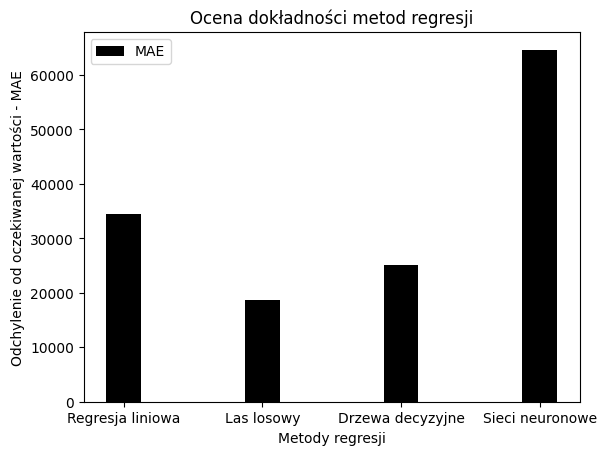

In [88]:
from matplotlib import pyplot as plt
import numpy as np

X = ['Regresja liniowa', 'Las losowy', 'Drzewa decyzyjne', 'Sieci neuronowe']
Y_MAE = [
    mean_absolute_error(y_test, y_pred_linear), 
    mean_absolute_error(y_test, y_pred_forest), 
    mean_absolute_error(y_test, y_pred_trees), 
    mean_absolute_error(y_test, y_pred_neural),
]
x_axis = np.arange(len(X))
plt.bar(x_axis, Y_MAE, 0.25, label = 'MAE', color='black') 
#plt.bar(x_axis + 0.2, Y_MSE, 0.2, label = 'MSE') 
plt.xticks(x_axis, X) 
plt.xlabel("Metody regresji") 
plt.ylabel("Odchylenie od oczekiwanej wartości - MAE") 
plt.title("Ocena dokładności metod regresji") 
plt.legend() 
plt.show() 

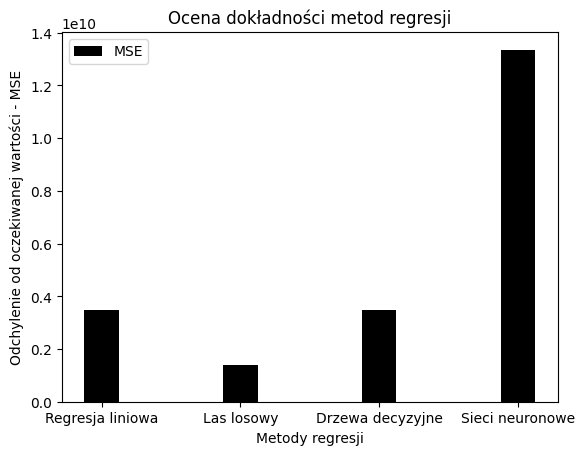

In [89]:
Y_MSE = [
    mean_squared_error(y_test, y_pred_linear), 
    mean_squared_error(y_test, y_pred_forest), 
    mean_squared_error(y_test, y_pred_trees), 
    mean_squared_error(y_test, y_pred_neural),
]
x_axis = np.arange(len(X))
plt.bar(x_axis, Y_MSE, 0.25, label = 'MSE', color='black') 
#plt.bar(x_axis + 0.2, Y_MSE, 0.2, label = 'MSE') 
plt.xticks(x_axis, X) 
plt.xlabel("Metody regresji") 
plt.ylabel("Odchylenie od oczekiwanej wartości - MSE") 
plt.title("Ocena dokładności metod regresji") 
plt.legend() 
plt.show() 

In [102]:

from sklearn.model_selection import GridSearchCV

tuned_parameters = {
 'model__min_samples_leaf': [1,2],
 'model__min_samples_split': [1,2],
 'model__n_estimators': [150]
}

grid_search = GridSearchCV(pipe_random_forest, tuned_parameters, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
print("Set parameters to: ", grid_search.best_params_)
final_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", RandomForestRegressor(min_samples_leaf= 2, min_samples_split= 2, n_estimators= 150))]
)

C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\AppData\Local\Prog

Set parameters to:  {'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 150}


In [69]:
import pickle, gzip
import joblib

joblib.dump(final_pipeline, 'first_estimation.pkl', compress = True)

result = joblib.load('first_estimation.pkl')